In [1]:
import pandas as pd
from tqdm import tqdm
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import re
import gensim
import gensim.corpora as corpora
from pprint import pprint

# Read tweet data

In [2]:
all_df = pd.read_csv("tweet_all.csv", lineterminator="\n")
df = all_df.copy()
df.shape

(1810294, 10)

In [69]:
for i in range(len(df)):
    if "vax" in df.iloc[i]["combined_text"]:
        print(df.iloc[i]["combined_text"])
        break

Anti-vaxxers using the coronavirus as an excuse to be anti-Chinese when they don’t even get the flu shot to protect their own children is peak irony. 


# Problem 1. Key Word Counting

In [3]:
df["date"] = df["time"].str[-4:] +"-" + df["time"].str[:2]
df = df.drop(["time"],axis=1)
df = df.rename(columns={"state": "states"})
df.head(1)

,tweet_id,combined_text,favourites_count,followers_count,friends_count,statuses_count,rt_status,states,token_list,date
0,1223471140317909004,Veteran journo canned after making ‘racist’ jo...,28128,4478,4826,42564,0,Tennessee,"['veteran', 'journo', 'racist', 'joke', 'https...",2020-02


In [4]:
# list of word list
tokens_list = []
# list of all words
words = []
for i in tqdm(range(len(df))):
    token_list = df.iloc[i]["token_list"].replace("'", "").replace(" ", "")[1:-1].split(",")
    tokens_list.append(token_list)
    words += token_list

100%|██████████| 1810294/1810294 [03:02<00:00, 9938.53it/s] 


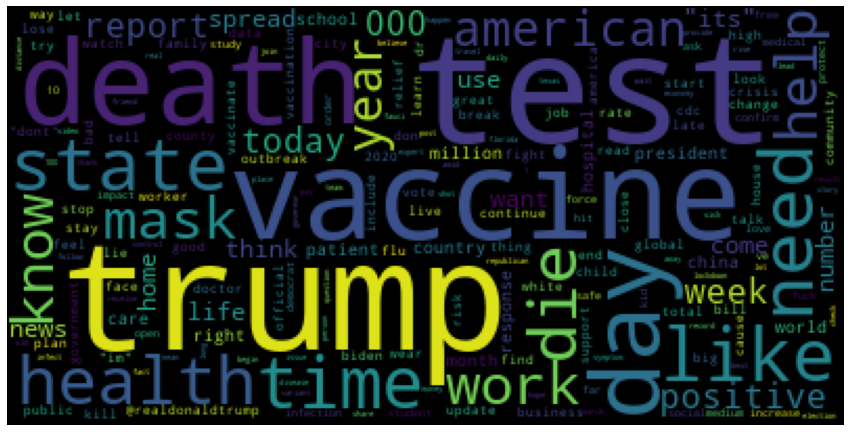

In [5]:
plt.figure(figsize=(15, 15))

plt.plot()
word_could_dict=Counter(words)
#print(word_could_dict)

wordcloud = WordCloud().generate_from_frequencies(word_could_dict)
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

In [6]:
Counter(words).most_common(10)

[('test', 160115),
 ('trump', 154892),
 ('vaccine', 149933),
 ('death', 136971),
 ('day', 93245),
 ('state', 92856),
 ('need', 92098),
 ('like', 90660),
 ('time', 85696),
 ('health', 83296)]

The top 10 key words are test, trump, vaccine, death, day, state, need, like, time and health.

In [7]:
date_list = list(df["date"].unique())

In [8]:
# count keywords in each tweet
top_words = ["test", "trump", "vaccine", "death", "day", "state", "need", "like", "time", "health"]
top_words_dict = {}
for i in top_words:
    top_words_dict[i] = [0] * len(tokens_list)

In [9]:
for i in tqdm(range(len(tokens_list))):
    words = tokens_list[i]
    for word in words:
        if word in top_words_dict:
            top_words_dict[word][i] += 1    

100%|██████████| 1810294/1810294 [00:02<00:00, 653630.54it/s]


In [10]:
for word in top_words_dict.keys():
    df[word] = top_words_dict[word]

In [11]:
df["count"] = [1] * len(df)
df.head(1)

,tweet_id,combined_text,favourites_count,followers_count,friends_count,statuses_count,rt_status,states,token_list,date,...,trump,vaccine,death,day,state,need,like,time,health,count
0,1223471140317909004,Veteran journo canned after making ‘racist’ jo...,28128,4478,4826,42564,0,Tennessee,"['veteran', 'journo', 'racist', 'joke', 'https...",2020-02,...,0,0,0,0,0,0,0,0,0,1


In [49]:
count_date_df = df.groupby(["date"]).sum()
# count_date_df = count_date_df.sort_values(by="date")
count_date_df.head(1)

,tweet_id,favourites_count,followers_count,friends_count,statuses_count,rt_status,test,trump,vaccine,death,day,state,need,like,time,health,count
date,,,,,,,,,,,,,,,,,
2020-02,5.073683e+22,1.690769e+09,1.503009e+09,177301152.0,3.337689e+09,22077.0,2559.0,4154.0,896.0,2743.0,1609.0,1560.0,1246.0,1733.0,1526.0,2607.0,41262.0


In [52]:
count_date_df = count_date_df[:-1]

In [53]:
count_date_df = count_date_df[["count", "test", "trump", "vaccine", "death", "day", "state", "need", "like", "time", "health"]]

In [54]:
# count_date_df_1 = count_date_df[["count", "test", "trump", "vaccine", "death", "day"]]
# count_date_df_2 = count_date_df[["count", "state", "need", "like", "time", "health"]]
count_date_df_3 = count_date_df.drop(["count"],axis=1)

In [55]:
cor

NameError: name 'cor' is not defined

<AxesSubplot:>

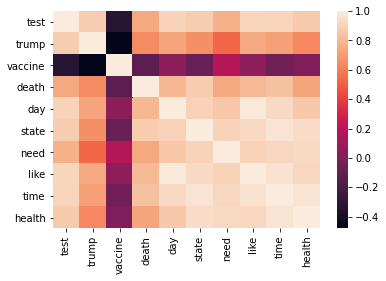

In [124]:
# count_date_df_3
cor = count_date_df_3.corr()
sns.heatmap(cor)

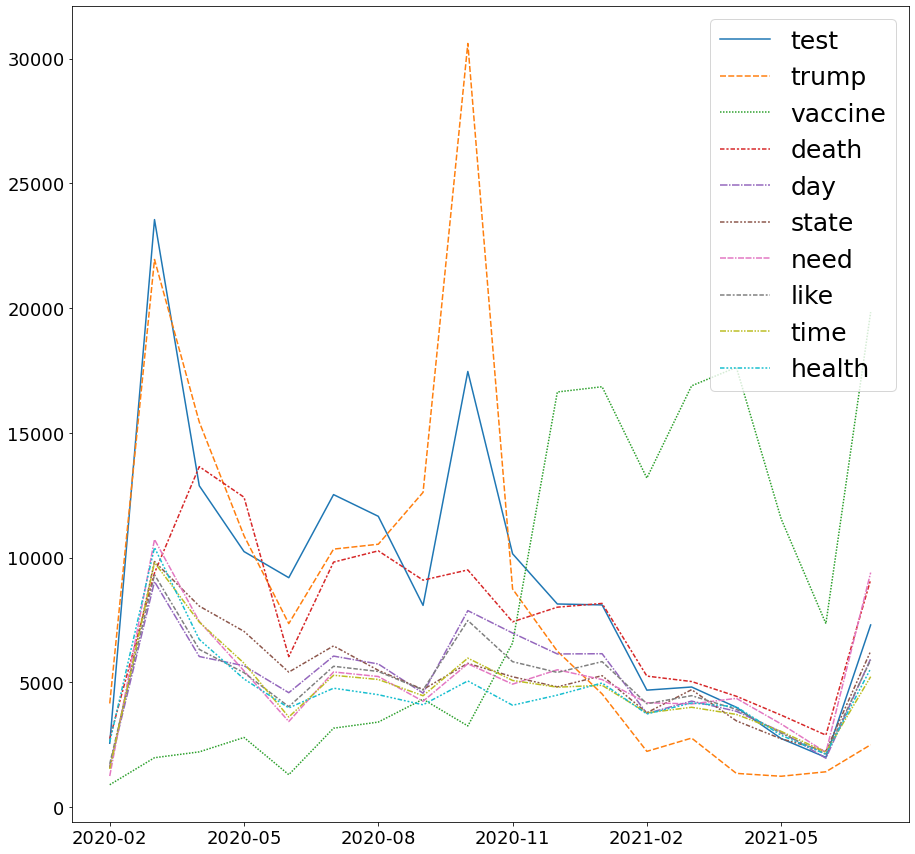

In [58]:
import numpy as np
plt.figure(figsize=(15, 15))
sns.lineplot(data=count_date_df_3).set_xticks(np.arange(0, count_date_df_3.shape[0], step=3))  
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize=25)
plt.xlabel("")
plt.show()

# Compare vaccine in Twitter and Bing

In [22]:
compare = pd.DataFrame(index = ['2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07'])

In [118]:
vaccine_twitter = list(count_date_df_3["vaccine"].iloc[:-1])
vaccine_twitter

NameError: name 'count_date_df_3' is not defined

In [23]:
vaccine_twitter = [896.0,
 1979.0,
 2213.0,
 2790.0,
 1299.0,
 3162.0,
 3407.0,
 4324.0,
 3253.0,
 6576.0,
 16637.0,
 16847.0,
 13188.0,
 16884.0,
 17624.0,
 11554.0,
 7354.0,
 19835.0]

In [24]:
vaccine_bing = [413,
 1759,
 1604,
 1399,
 1458,
 2556,
 2438,
 2340,
 2120,
 5634,
 107538,
 36614,
 39023,
 53761,
 26414,
 11356,
 6176,
 54819]

In [25]:
vac_list = [0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5615390.0,
 32093884.0,
 49940125.0,
 84139742.0,
 90419967.0,
 50424252.0,
 25315690.0,
 16452817.0]

In [26]:
# sentiment_df = pd.read_csv("sentiment_vacc.csv")
sentiment_df_2 = pd.read_csv("sentiment.csv")
sentiment_df_twitter = sentiment_df_2[:18]
sentiment_df_bing = sentiment_df_2[18:]

In [27]:
sentiment_df_bing

,Month of Month,Measure Names,Measure Values
18,February 2020,Avg. Bing Senti,-0.022426
19,March 2020,Avg. Bing Senti,-0.002895
20,April 2020,Avg. Bing Senti,0.004462
21,May 2020,Avg. Bing Senti,0.005706
22,June 2020,Avg. Bing Senti,-0.005435
23,July 2020,Avg. Bing Senti,-0.004041
24,August 2020,Avg. Bing Senti,-0.010213
25,September 2020,Avg. Bing Senti,-0.011753
26,October 2020,Avg. Bing Senti,0.000814
27,November 2020,Avg. Bing Senti,-0.000822


In [28]:
sentiment_bing = list(sentiment_df_bing["Measure Values"])
sentiment_twitter = list(sentiment_df_twitter["Measure Values"])

In [29]:
compare["Vaccine_Count_Bing"] = vaccine_bing
compare["Vaccine_Count_Twitter"] = vaccine_twitter
compare["Vaccine_Administered"] = vac_list
compare["Sentimet_Bing"] = sentiment_bing
compare["Sentimet_Twitter"] = sentiment_twitter
compare

,Vaccine_Count_Bing,Vaccine_Count_Twitter,Vaccine_Administered,Sentimet_Bing,Sentimet_Twitter
2020-02,413,896.0,0.0,-0.022426,-0.114028
2020-03,1759,1979.0,0.0,-0.002895,-0.011304
2020-04,1604,2213.0,0.0,0.004462,-0.022401
2020-05,1399,2790.0,0.0,0.005706,-0.026775
2020-06,1458,1299.0,0.0,-0.005435,-0.028550
2020-07,2556,3162.0,0.0,-0.004041,-0.022009
2020-08,2438,3407.0,0.0,-0.010213,-0.016810
2020-09,2340,4324.0,0.0,-0.011753,-0.025304
2020-10,2120,3253.0,0.0,0.000814,-0.007486
2020-11,5634,6576.0,0.0,-0.000822,0.019346


In [195]:
compare.keys()

Index(['Vaccine_Count_Bing', 'Vaccine_Count_Twitter', 'Vaccine_Administered',
       'Sentimet_Bing', 'Sentimet_Twitter'],
      dtype='object')

In [30]:

# example of a standardization
import numpy as np
from numpy import asarray
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(compare.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'Vaccine_Count_Bing', 'Vaccine_Count_Twitter', 'Vaccine_Administered',
       'Sentimet_Bing', 'Sentimet_Twitter'])

In [31]:
df_scaled

,Vaccine_Count_Bing,Vaccine_Count_Twitter,Vaccine_Administered,Sentimet_Bing,Sentimet_Twitter
0,-0.693369,-1.130199,-0.675610,-3.026326,-2.853108
1,-0.645371,-0.965404,-0.675610,0.046321,-0.246409
2,-0.650898,-0.929797,-0.675610,1.203790,-0.527991
3,-0.658208,-0.841998,-0.675610,1.399494,-0.638986
4,-0.656104,-1.068876,-0.675610,-0.353281,-0.684037
5,-0.616949,-0.785393,-0.675610,-0.133932,-0.518045
6,-0.621157,-0.748112,-0.675610,-1.104935,-0.386133
7,-0.624652,-0.608577,-0.675610,-1.347124,-0.601655
8,-0.632497,-0.771546,-0.675610,0.629867,-0.149508
9,-0.507187,-0.265900,-0.675610,0.372441,0.531371


In [38]:
df_scaled["index"] = ['2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07']

In [40]:
df_scaled = df_scaled.set_index("index")

In [127]:
compare["Vaccine_Administered"] = compare["Vaccine_Administered"] / 1000

In [132]:
compare["Sentimet_Bing"] = compare["Sentimet_Bing"] * 1000

In [133]:
compare["Sentimet_Twitter"] = compare["Sentimet_Twitter"] * 1000

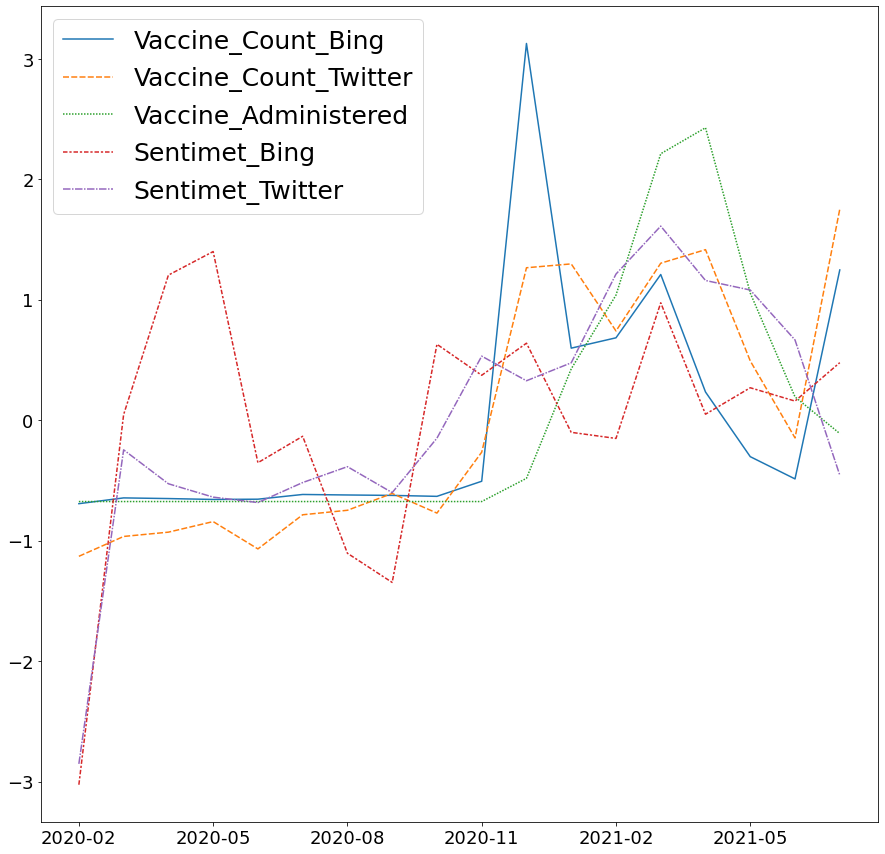

In [48]:
plt.figure(figsize=(15, 15))
sns.lineplot(data=df_scaled).set_xticks(np.arange(0, df_scaled.shape[0], step=3))
plt.legend(fontsize = 25)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('')

plt.show()

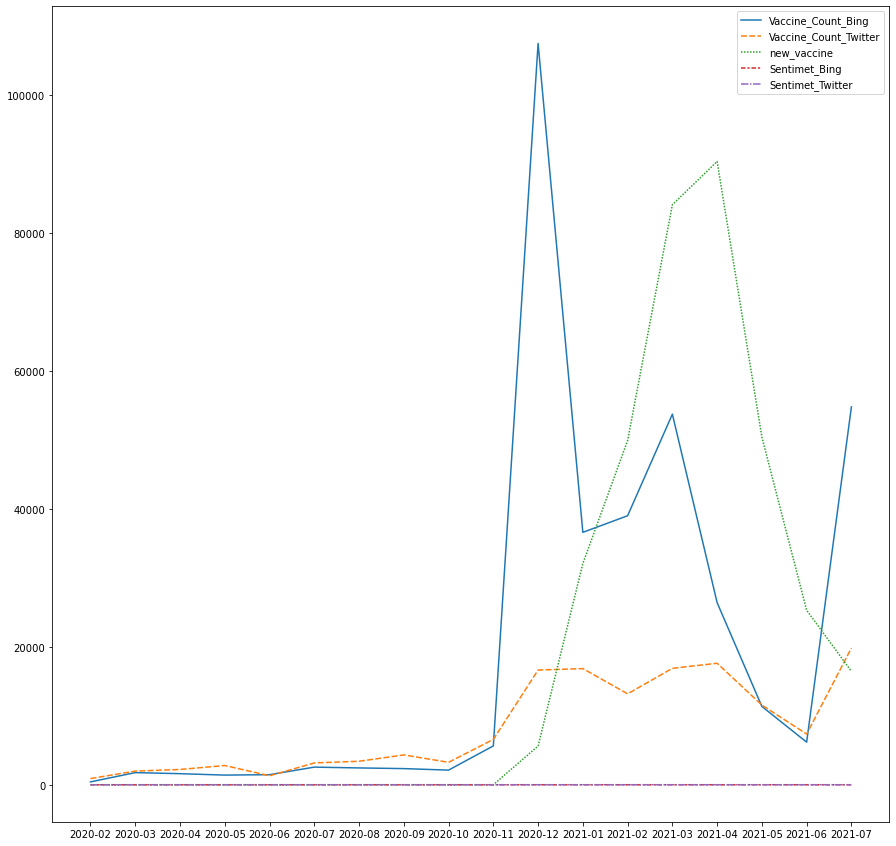

In [46]:
plt.figure(figsize=(15, 15))
sns.lineplot(data=compare)
plt.show()

,Vaccine_Count_Bing,Vaccine_Count_Twitter,Vaccine_Administered,Sentimet_Bing,Sentimet_Twitter
Vaccine_Count_Bing,1.000000,0.803817,0.355753,0.282084,0.402406
Vaccine_Count_Twitter,0.803817,1.000000,0.711320,0.303907,0.642162
Vaccine_Administered,0.355753,0.711320,1.000000,0.199396,0.727866
Sentimet_Bing,0.282084,0.303907,0.199396,1.000000,0.584762
Sentimet_Twitter,0.402406,0.642162,0.727866,0.584762,1.000000


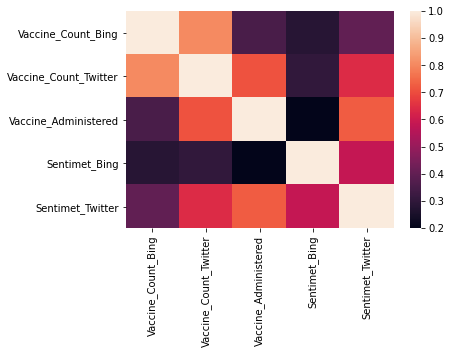

In [210]:
cor_senti = df_scaled.corr()
sns.heatmap(cor_senti)
cor_senti

,Vaccine_Count_Bing,Vaccine_Count_Twitter,Vaccine_Administered,Sentimet_Bing,Sentimet_Twitter
Vaccine_Count_Bing,1.000000,0.803817,0.355753,0.282084,0.402406
Vaccine_Count_Twitter,0.803817,1.000000,0.711320,0.303907,0.642162
Vaccine_Administered,0.355753,0.711320,1.000000,0.199396,0.727866
Sentimet_Bing,0.282084,0.303907,0.199396,1.000000,0.584762
Sentimet_Twitter,0.402406,0.642162,0.727866,0.584762,1.000000


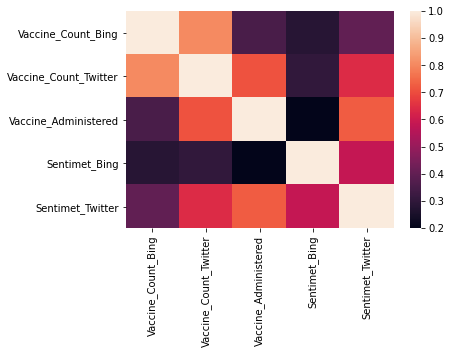

In [211]:
cor_senti = compare.corr()
sns.heatmap(cor_senti)
cor_senti

[Text(0.5, 1.0, "Trend for 'Vaccine'")]

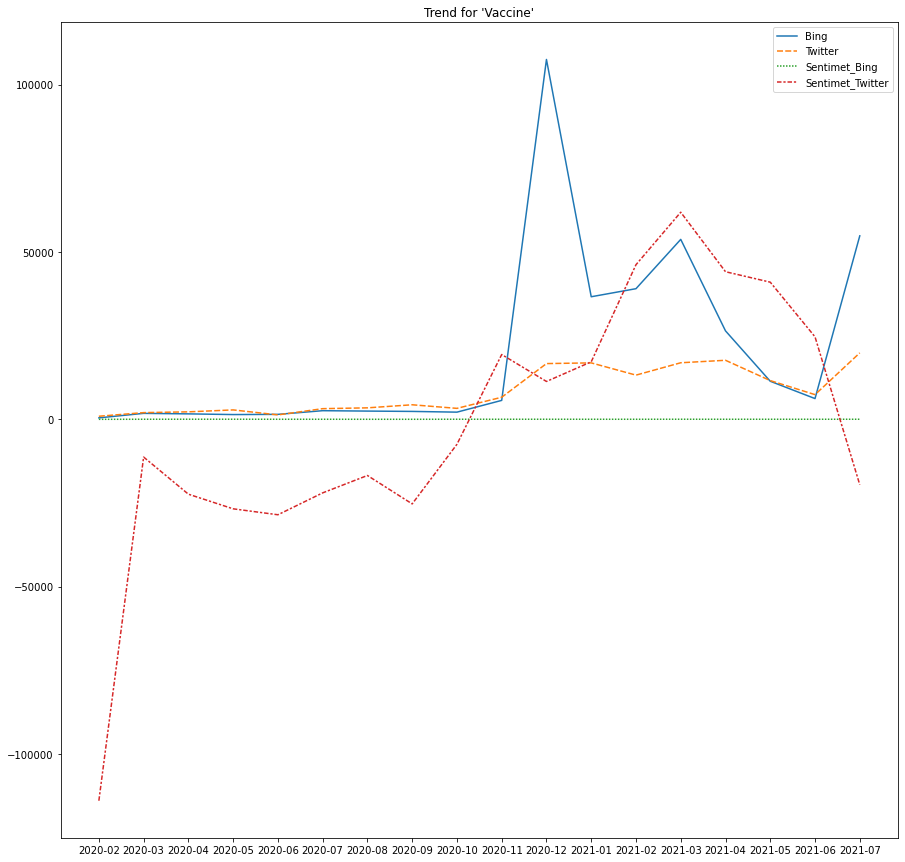

In [105]:
plt.figure(figsize=(15, 15))
sns.lineplot(data=compare).set(title="Trend for 'Vaccine'")

[Text(0.5, 1.0, "Trend for 'Vaccine' on Bing and Twitter")]

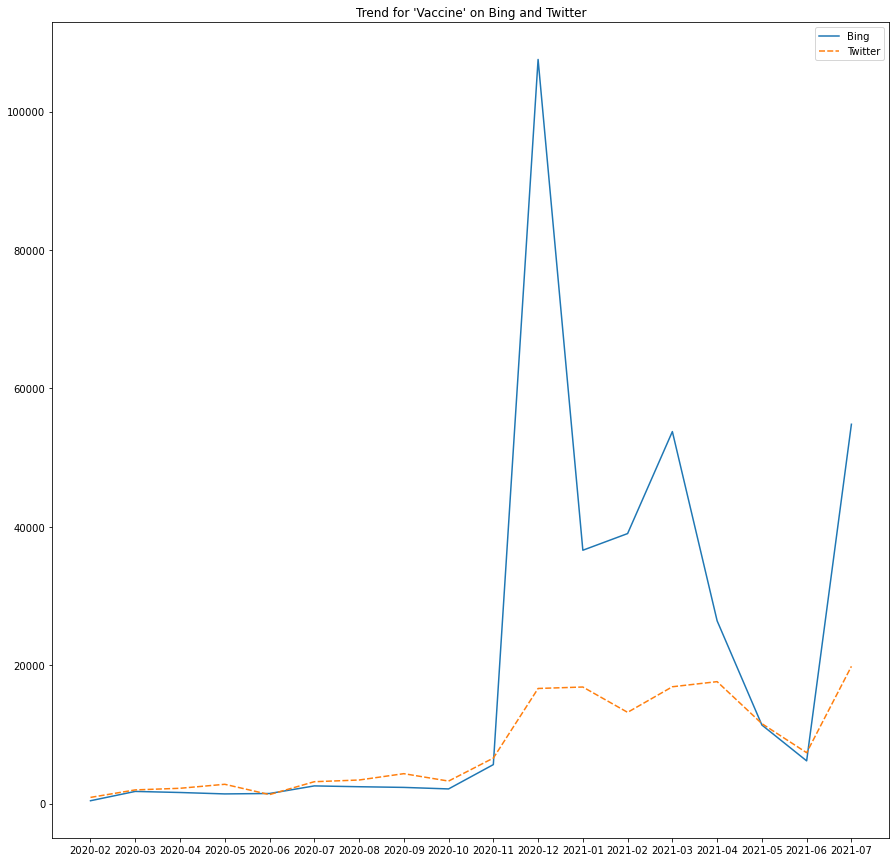

In [60]:
plt.figure(figsize=(15, 15))
sns.lineplot(data=compare).set(title="Trend for 'Vaccine' on Bing and Twitter")

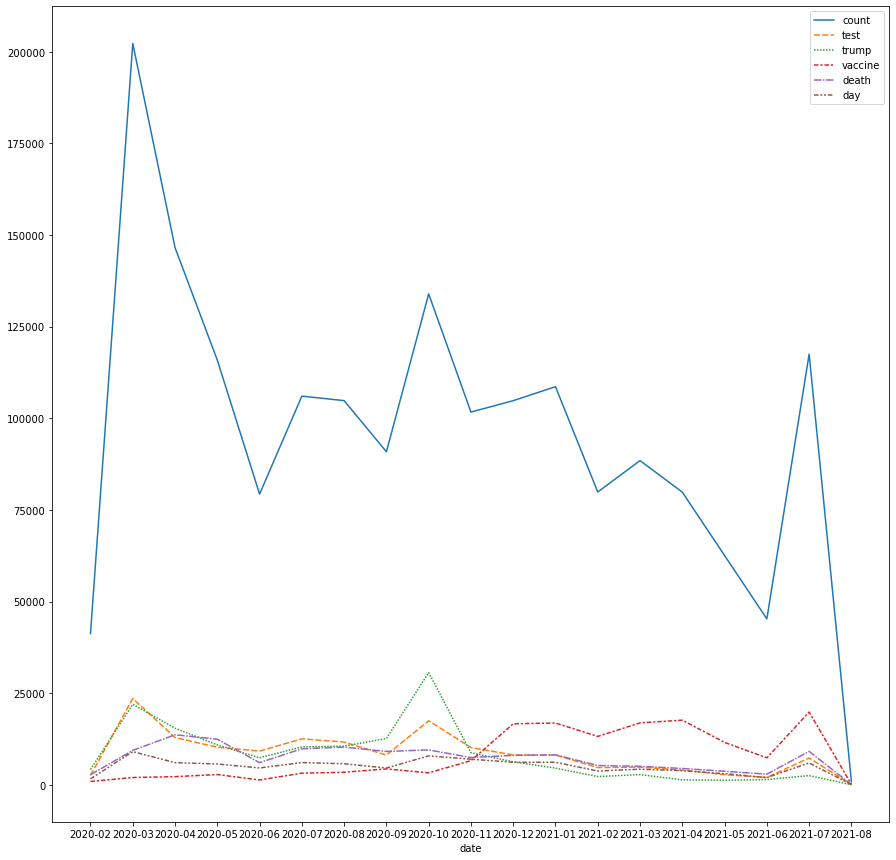

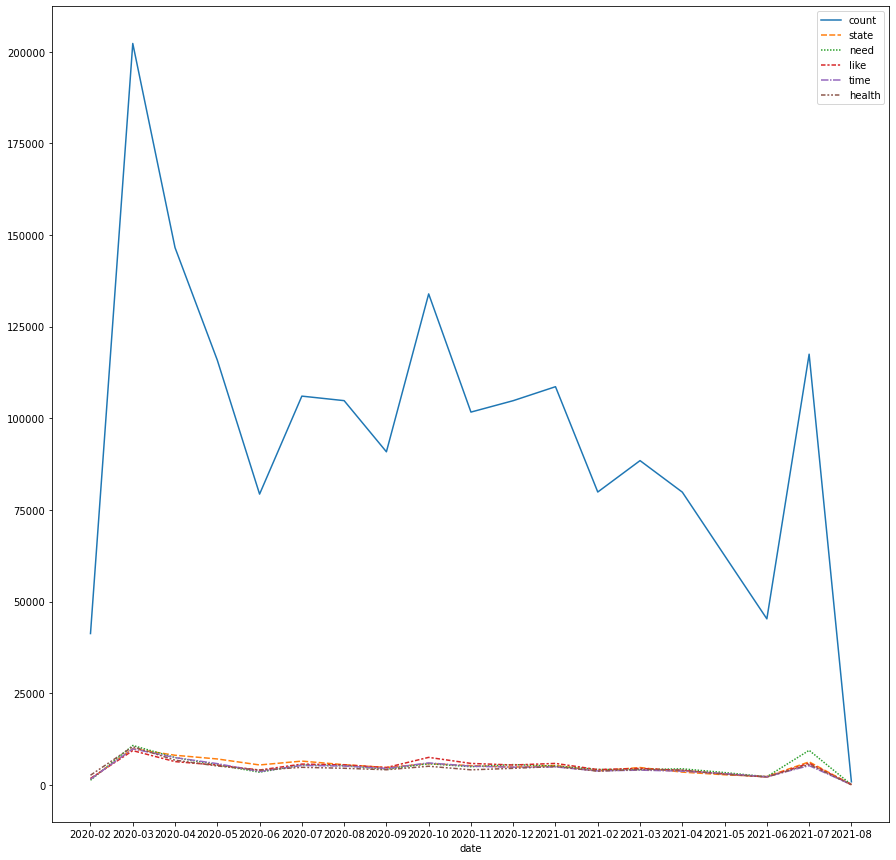

In [35]:
plt.figure(figsize=(15, 15))
sns.lineplot(data=count_date_df_1)
plt.show()

plt.figure(figsize=(15, 15))
sns.lineplot(data=count_date_df_2)
plt.show()

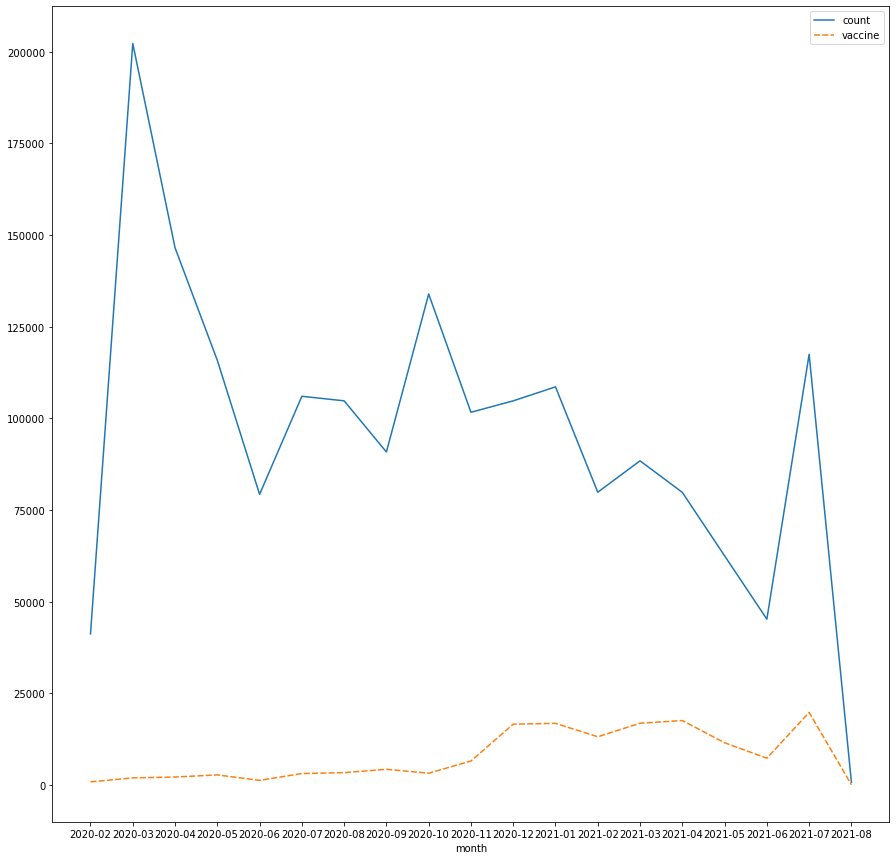

In [24]:
plt.figure(figsize=(15, 15))
sns.lineplot(data=count_month_df_3)
plt.show()

# Problem 2. Compare cases with vaccine key words

In [55]:
case = pd.read_csv("owid-covid-data.csv")

In [56]:
case.shape

(178330, 67)

In [28]:
case

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178325,ZWE,Africa,Zimbabwe,2022-04-08,246925.0,55.0,73.000,5457.0,2.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
178326,ZWE,Africa,Zimbabwe,2022-04-09,246925.0,0.0,63.429,5457.0,0.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
178327,ZWE,Africa,Zimbabwe,2022-04-10,246958.0,33.0,61.857,5457.0,0.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
178328,ZWE,Africa,Zimbabwe,2022-04-11,247010.0,52.0,56.857,5460.0,3.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [6]:
"United States" in list(case["location"])

True

In [57]:
case_US = case[case["iso_code"] == "USA"]
case_US = case_US[["date", "new_cases_per_million", "new_deaths_per_million", "new_vaccinations", "people_fully_vaccinated_per_hundred"]]
case_US = case_US.fillna(0)
case_US.head()

,date,new_cases_per_million,new_deaths_per_million,new_vaccinations,people_fully_vaccinated_per_hundred
167987,2020-01-22,0.000,0.0,0.0,0.0
167988,2020-01-23,0.000,0.0,0.0,0.0
167989,2020-01-24,0.003,0.0,0.0,0.0
167990,2020-01-25,0.000,0.0,0.0,0.0
167991,2020-01-26,0.009,0.0,0.0,0.0


In [49]:
case_US[583:588]

,date,new_cases_per_million,new_deaths_per_million,new_vaccinations,people_fully_vaccinated_per_hundred
168570,2021-08-27,716.940,5.206,1173656.0,53.77
168571,2021-08-28,236.976,1.949,713224.0,53.87
168572,2021-08-29,156.241,0.931,430823.0,53.94
168573,2021-08-30,688.506,5.130,927604.0,54.07
168574,2021-08-31,540.510,4.265,928280.0,54.19


In [58]:
case_date_list = list(case_US["date"])
case_month_list = []
for i in case_date_list:
    month = i[:-3]
    case_month_list.append(month)
case_US["month"] = case_month_list
case_US.head(1)

,date,new_cases_per_million,new_deaths_per_million,new_vaccinations,people_fully_vaccinated_per_hundred,month
167987,2020-01-22,0.0,0.0,0.0,0.0,2020-01


In [59]:
case_US = case_US.drop(["date"], axis=1)
month_case_US = case_US.groupby("month").sum()
# month_case_US["new_vaccinations"] = month_case_US["new_vaccinations"] / 1000
month_case_US.head(1)

,new_cases_per_million,new_deaths_per_million,new_vaccinations,people_fully_vaccinated_per_hundred
month,,,,
2020-01,0.021,0.0,0.0,0.0


In [60]:
vac_list = list(month_case_US["new_vaccinations"])[1:-9]
len(vac_list)

18

In [61]:
vac_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5615390.0,
 32093884.0,
 49940125.0,
 84139742.0,
 90419967.0,
 50424252.0,
 25315690.0,
 16452817.0]

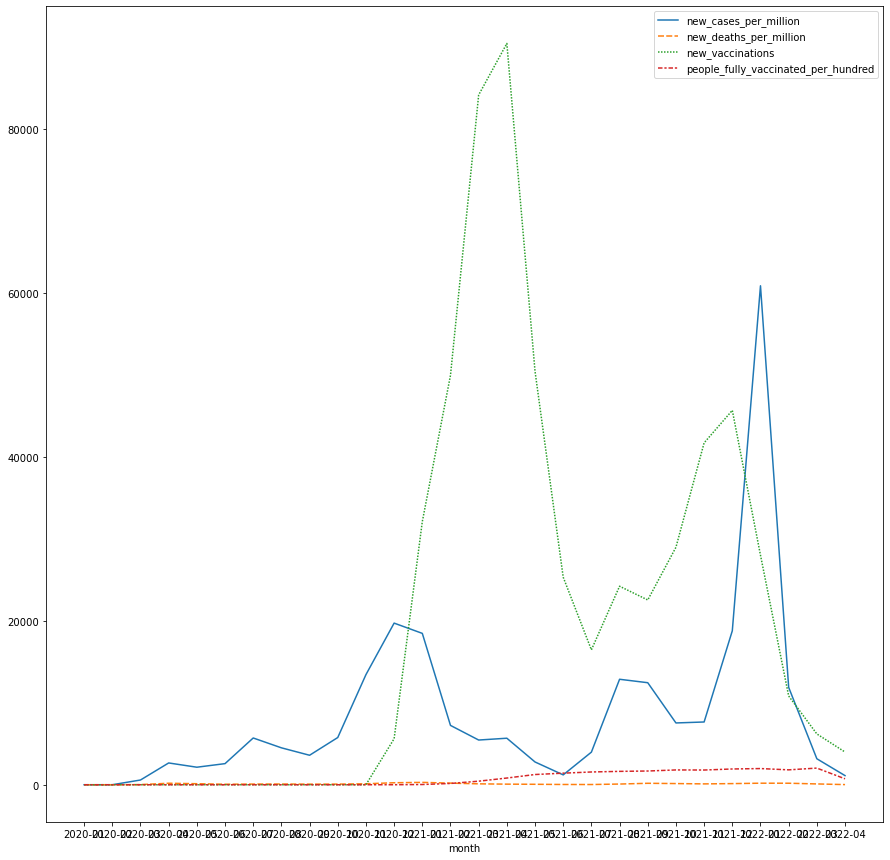

In [19]:
plt.figure(figsize=(15, 15))
sns.lineplot(data=month_case_US)
plt.show()

In [20]:
month_case_US

,new_cases_per_million,new_deaths_per_million,new_vaccinations,people_fully_vaccinated_per_hundred
month,,,,
2020-01,0.021,0.000,0.000,0.00
2020-02,0.051,0.003,0.000,0.00
2020-03,576.886,16.093,0.000,0.00
2020-04,2656.648,182.611,0.000,0.00
2020-05,2137.842,124.718,0.000,0.00
2020-06,2573.786,59.146,0.000,0.00
2020-07,5702.981,79.489,0.000,0.00
2020-08,4503.269,86.594,0.000,0.00
2020-09,3596.017,69.736,0.000,0.00


In [21]:
month_case_US = month_case_US.iloc[1:-9]
month_case_US.tail(5)

,new_cases_per_million,new_deaths_per_million,new_vaccinations,people_fully_vaccinated_per_hundred
month,,,,
2021-03,5453.045,109.954,84139.742,433.63
2021-04,5674.031,71.499,90419.967,816.88
2021-05,2776.442,55.155,50424.252,1246.19
2021-06,1202.596,31.562,25315.690,1411.52
2021-07,3977.113,26.279,16452.817,1556.13


In [71]:
# month_case_US["new_deaths_per_million"] = month_case_US["new_deaths_per_million"] * 100
month_case_US["vaccine_Twitter"] = vaccine_twitter
month_case_US["vaccine_Bing"] = vaccine_bing

# month_case_US["total_cases_per_million"] = month_case_US["total_cases_per_million"] / 100
month_case_US.head(1)

<ipython-input-71-d5673bd8ff53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_case_US["vaccine_Twitter"] = vaccine_twitter
<ipython-input-71-d5673bd8ff53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_case_US["vaccine_Bing"] = vaccine_bing


,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,vaccine_Twitter,vaccine_Bing
month,,,,,,
2020-02,1.206,0.051,0.003,0.003,896.0,413


In [74]:
month_case_US["total_cases_per_million"] = month_case_US["total_cases_per_million"] / 100
month_case_US.tail(1)

<ipython-input-74-310414ff2ce1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_case_US["total_cases_per_million"] = month_case_US["total_cases_per_million"] / 100


,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,vaccine_Twitter,vaccine_Bing
month,,,,,,
2021-07,31885.07332,3977.113,56315.512,26.279,19835.0,54819


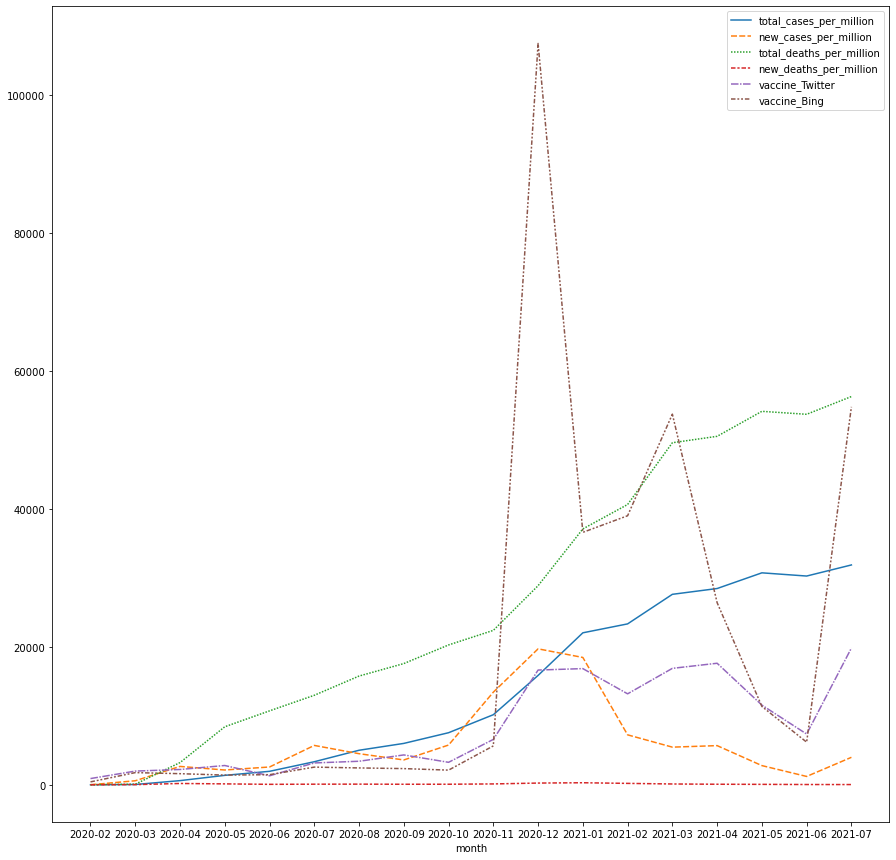

In [75]:
plt.figure(figsize=(15, 15))
sns.lineplot(data=month_case_US)
plt.show()

In [76]:
new_vac = month_case_US.drop(["total_cases_per_million", "total_deaths_per_million"], axis=1)
new_vac.head(1)

,new_cases_per_million,new_deaths_per_million,vaccine_Twitter,vaccine_Bing
month,,,,
2020-02,0.051,0.003,896.0,413


In [108]:
list(new_vac["new_cases_per_million"])

[0.051000000000000004,
 576.8860000000001,
 2656.6479999999992,
 2137.842,
 2573.786,
 5702.981000000002,
 4503.269000000001,
 3596.0170000000007,
 5759.61,
 13428.546,
 19714.828000000005,
 18463.404000000002,
 7237.412000000001,
 5453.045,
 5674.030999999999,
 2776.4420000000014,
 1202.5960000000002,
 3977.113]

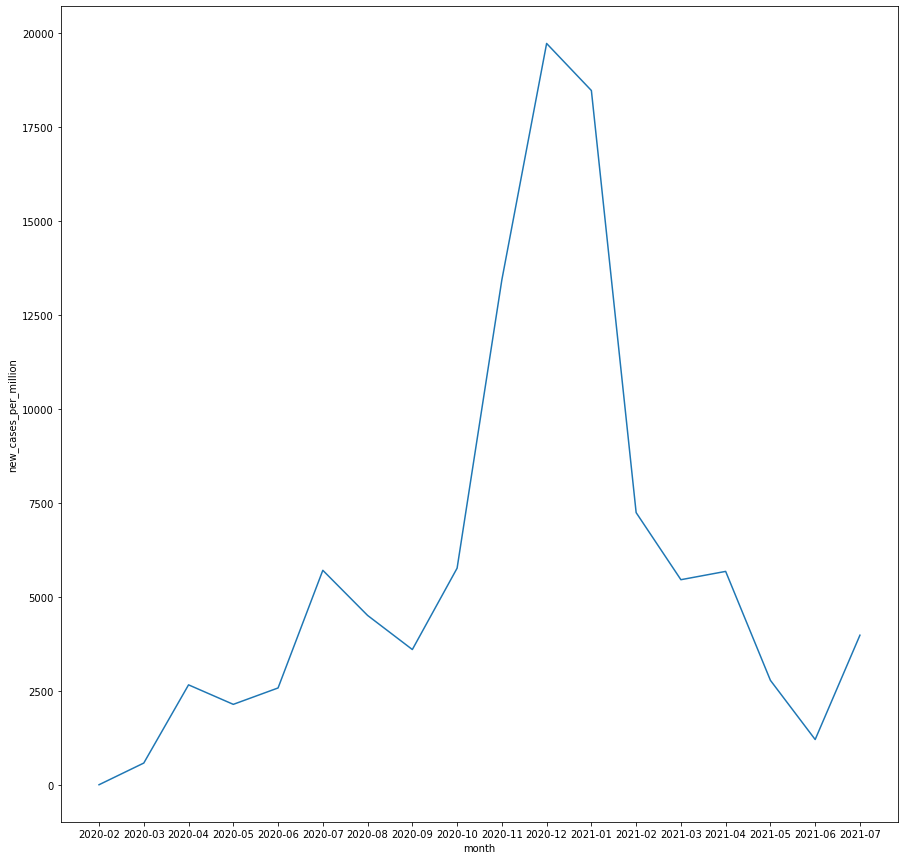

In [106]:
plt.figure(figsize=(15, 15))
sns.lineplot(data=new_vac["new_cases_per_million"])
plt.show()

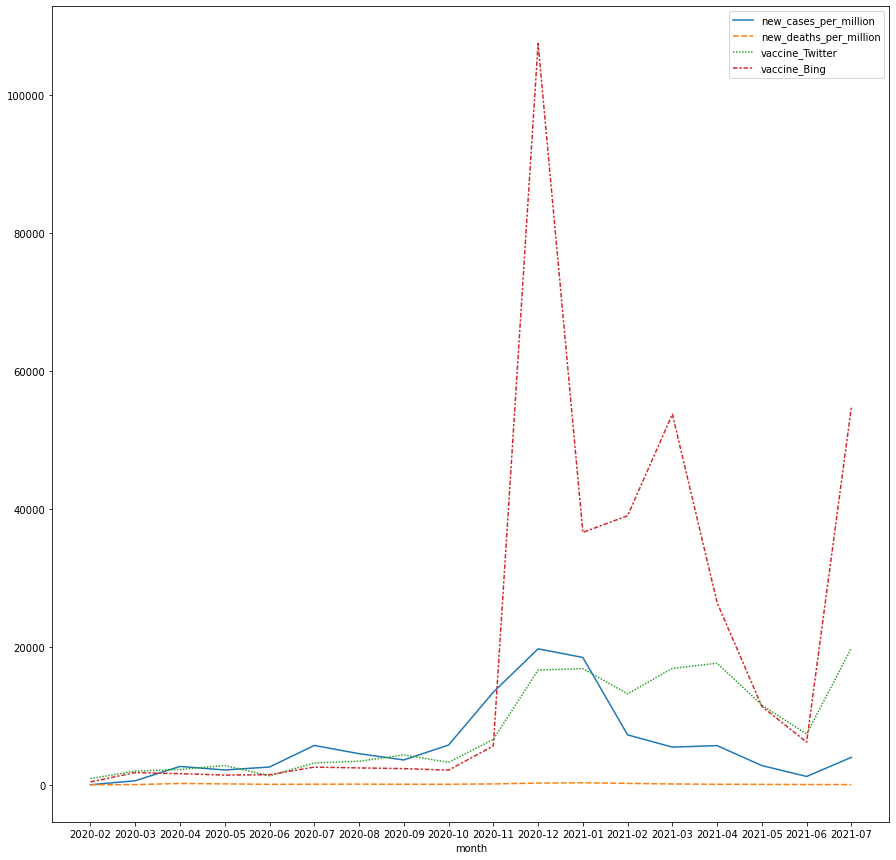

In [78]:
plt.figure(figsize=(15, 15))
sns.lineplot(data=new_vac["new_cases_per_million"])
plt.show()

The trend for new cases and the trend for word frequency for word "vaccine" close to each other.

# Problem 3. Topic Modeling

In [76]:
df.tail()

,tweet_id,combined_text,date,favourites_count,followers_count,friends_count,statuses_count,rt_status,state,token_list,test,trump,vaccine,death,day,need,like,time,health,count
1810289,1421680845602050051,- The locking up of children in cold tight qua...,2021-08-01,217764,1761,2775,55936,1,1,"['lock', 'child', 'cold', 'tight', 'quarter', ...",0,0,0,1,0,0,0,0,0,1
1810290,1421681168584478722,@FoxNews As covid rages the state. Good one De...,2021-08-01,2062,48,279,7915,0,1,"['@foxnews', 'rage', 'state', 'good', 'deathsa...",0,0,0,0,0,0,0,0,0,1
1810291,1421681267125460995,@CoreyBrickley GIVE ME MOAR COVID JUICE,2021-08-01,37459,2593,2783,12406,0,0,"['@coreybrickley', 'moar', 'juice']\r",0,0,0,0,0,0,0,0,0,1
1810292,1421681374919024640,Tuberculosis:The Forgotten Pandemic\nhttps://t...,2021-08-01,368,146,413,7888,1,0,"['tuberculosis', 'forgotten', 'https://t.co/rm...",0,0,0,0,0,0,0,0,0,1
1810293,1421681713009332226,When you start to get loss of taste and smell ...,2021-08-01,12586,816,670,19875,0,0,"['start', 'loss', 'taste', 'smell', 'like', 's...",0,0,0,0,0,0,1,0,0,1


In [70]:
df_topic = df[["date"]]
df_topic["words_list"] = tokens_list
df_topic.head(1)

<ipython-input-70-e3c3575f8a3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic["words_list"] = tokens_list


,date,words_list
0,2020-02-01,"[veteran, journo, racist, joke, https://t.co/v..."


In [73]:
date_df_topic = list(df_topic["date"])
month_df_topic = []
for i in date_df_topic:
    month = i[:-3]
    month_df_topic.append(month)
df_topic["month"] = month_df_topic
df_topic.head(1)

<ipython-input-73-01eacd318c86>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic["month"] = month_df_topic


,date,words_list,month
0,2020-02-01,"[veteran, journo, racist, joke, https://t.co/v...",2020-02


In [77]:
df_topic.tail()

,date,words_list,month
1810289,2021-08-01,"[lock, child, cold, tight, quarter, normalize,...",2021-08
1810290,2021-08-01,"[@foxnews, rage, state, good, deathsantis]]",2021-08
1810291,2021-08-01,"[@coreybrickley, moar, juice]]",2021-08
1810292,2021-08-01,"[tuberculosis, forgotten, https://t.co/rm4sotz...",2021-08
1810293,2021-08-01,"[start, loss, taste, smell, like, swear, know]]",2021-08


In [82]:
month_list = list(df_topic["month"].unique())
month_list.sort()
month_list

['2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08']

In [85]:
month_topic_word_dict = {}
for i in month_list:
    month_topic_word_dict[i] = []

In [86]:
for i in tqdm(range(len(df_topic))):
    words = df_topic.iloc[i]["words_list"]
    month = df_topic.iloc[i]["month"]
    if month in month_topic_word_dict:
        month_topic_word_dict[month] += words

100%|██████████| 1810294/1810294 [03:55<00:00, 7694.28it/s]


In [183]:
df_each_month = df_topic[df_topic["month"]=="2021-08"]
df_each_month

,date,words_list,month
644460,2021-08-01,"[@bcbsupercat, @ac_ec, vaccinate, member, imme...",2021-08
644461,2021-08-01,[imagine],2021-08
644462,2021-08-01,"[mask-free, sweden, nears, zero, daily, death,...",2021-08
644463,2021-08-01,"[@remid0d0s0, @banffrachel, @_stah, sure, need...",2021-08
644464,2021-08-01,"[@theeconomist, @theeconomist, mainstream, med...",2021-08
...,...,...,...
1810289,2021-08-01,"[lock, child, cold, tight, quarter, normalize,...",2021-08
1810290,2021-08-01,"[@foxnews, rage, state, good, deathsantis]]",2021-08
1810291,2021-08-01,"[@coreybrickley, moar, juice]]",2021-08
1810292,2021-08-01,"[tuberculosis, forgotten, https://t.co/rm4sotz...",2021-08


In [184]:
tweet_tokens = [df_each_month.iloc[i]["words_list"] for i in range(len(df_each_month))]
len(tweet_tokens)

810

In [185]:
# Create Dictionary
id2word = corpora.Dictionary(tweet_tokens)
# Create Corpus
texts = tweet_tokens
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 2), (11, 1), (12, 1)]


In [186]:
# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"vaccinate" + 0.010*"vaccine" + 0.009*"die" + 0.008*"day" + '
  '0.007*"mask" + 0.006*"death" + 0.005*"old" + 0.005*"year" + 0.005*"young" + '
  '0.005*"000"'),
 (1,
  '0.007*"work" + 0.006*""its"" + 0.006*"floor" + 0.006*"patient" + '
  '0.006*"vaccine" + 0.005*"hospital" + 0.004*"time" + 0.004*"entire" + '
  '0.004*"capacity" + 0.004*"data"'),
 (2,
  '0.010*"vaccine" + 0.010*"vaccinate" + 0.007*"florida" + 0.005*"work" + '
  '0.005*"unvaccinated" + 0.005*"death" + 0.005*"variant" + 0.004*"hospital" + '
  '0.004*"bad" + 0.004*"state"'),
 (3,
  '0.008*"vaccine" + 0.007*"vaccinate" + 0.006*"american" + 0.006*"work" + '
  '0.005*"day" + 0.005*"like" + 0.005*""its"" + 0.005*"floor" + 0.005*"icu" + '
  '0.005*"die"'),
 (4,
  '0.009*"mask" + 0.008*"vaccine" + 0.007*"like" + 0.007*"vaccinate" + '
  '0.006*"state" + 0.005*""dont"" + 0.005*"wear" + 0.005*"start" + 0.004*"day" '
  '+ 0.004*"stop"')]


In [187]:
topic_list = []
for i in tqdm(range(len(corpus))):
    topic_list.append(lda_model.get_document_topics(corpus[i])[0][0])

Counter(topic_list)

100%|██████████| 810/810 [00:00<00:00, 4978.81it/s]


Counter({0: 665, 2: 28, 3: 31, 1: 41, 4: 45})